<a href="https://colab.research.google.com/github/gimbabheaven/zb-ds-28/blob/master/5.%20EDA/1.%20Analysis%20Seoul%20CCTV/3_Data_Drawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (6,967 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

# raw data

## 1. 데이터 불러오기

### 1. CSV 불러오기

In [ ]:
import pandas as pd

# CSV 파일 불러오기

CCTV_Seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rawdata/01. Seoul_CCTV.csv', encoding='utf-8')
CCTV_Seoul.tail() # tail : 끝 데이터, head : 앞 데이터

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [ ]:
# 컬럼 명 조회
CCTV_Seoul.columns

CCTV_Seoul.columns[0]

'기관명'

In [ ]:
# 컬럼 명 변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True) #inplace=True : 변경 작업 바로 저장
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


### 2. Excel 불러오기

In [ ]:
# 엑셀 파일 불러오기
pop_Seoul = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/rawdata/01. Seoul_Population.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


* 불러올 데이터 설정하기  
(1) header = 자료를 읽기 시작할 행 설정  
(2) usecols = 읽어올 엑셀의 컬럼 지정

In [ ]:
# 불러올 데이터 지정
pop_Seoul = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/rawdata/01. Seoul_Population.xls', header=2, usecols="B, D, G, J, N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [ ]:
# 컬럼 명 변경
pop_Seoul.rename(columns={pop_Seoul.columns[0] : "구별",
                          pop_Seoul.columns[1] : "인구수",
                          pop_Seoul.columns[2] : "한국인",
                          pop_Seoul.columns[3] : "외국인",
                          pop_Seoul.columns[4] : "고령자"}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## 2. CCTV 데이터 훑어보기

In [ ]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [ ]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [ ]:
# 소계 컬럼 기준 오름차순 정렬하여 5개 출력
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5) # True가 디폴트

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [ ]:
# 소계 컬럼 기준 내림차순 정렬하여 5개 출력
CCTV_Seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [ ]:
# 기존 컬럼이 없으면 추가, 있으면 수정(Merge)
CCTV_Seoul["최근증가율"] = (
    (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"])/CCTV_Seoul["2013년도 이전"] * 100
)
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구 현황 데이터 훑어보기

In [ ]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [ ]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [ ]:
# 합계 행 삭제
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [ ]:
# 한 번이라도 등장한 데이터들에 대해 보여줌
pop_Seoul["구별"].unique() #distinct

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [ ]:
# 전체 데이터 갯수 확인
len(pop_Seoul["구별"].unique())

25

In [ ]:
# 새로운 컬럼 생성(외국인 비율, 고령자 비율)
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [ ]:
pop_Seoul.sort_values(["인구수"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
pop_Seoul.sort_values(["외국인"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [ ]:
pop_Seoul.sort_values(["외국인비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [ ]:
pop_Seoul.sort_values(["고령자"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
pop_Seoul.sort_values(["고령자비율"], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 4. 두 데이터 합치기


In [ ]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [ ]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [ ]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [ ]:
del data_result["2013년도 이전"]

In [ ]:
del data_result["2014년"]

In [ ]:
data_result.head(1)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.87122,11.596073


In [ ]:
data_result.drop(["2015년", "2016년"], axis=1, inplace=True) # axis = 0 가로(행), axis = 1 세로(열)

In [ ]:
data_result.head(1)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073


#### 인덱스 변경
- set_index() : 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [ ]:
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [ ]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자
- 상관계수가 0.2 이상인 데이터 비교

In [ ]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [ ]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [ ]:
# 컬럼 추가
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [ ]:
# CCTV 비율이 높은 순으로 정렬
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


In [ ]:
# CCTV 비율이 낮은 순으로 정렬
data_result.sort_values(by="CCTV비율").head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


# matplotlib 기초

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

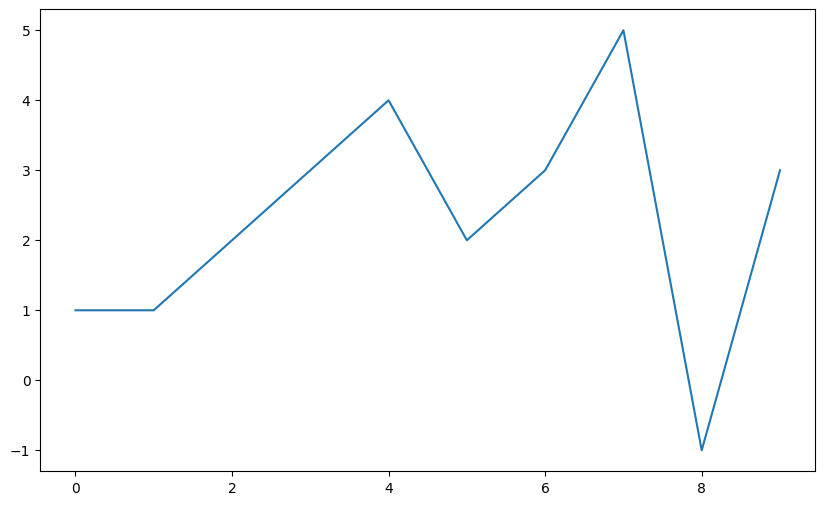

In [ ]:
plt.figure(figsize=(10, 6)) # 가로 10, 세로 6
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3]) # 그래프 내 데이터 삽입
plt.show()

### 예제1 : 그래프 기초

#### 삼각함수 그리기
* np.arrange(a, b, s) : a부터 b까지 s의 간격으로
* np.sin(value)

In [ ]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

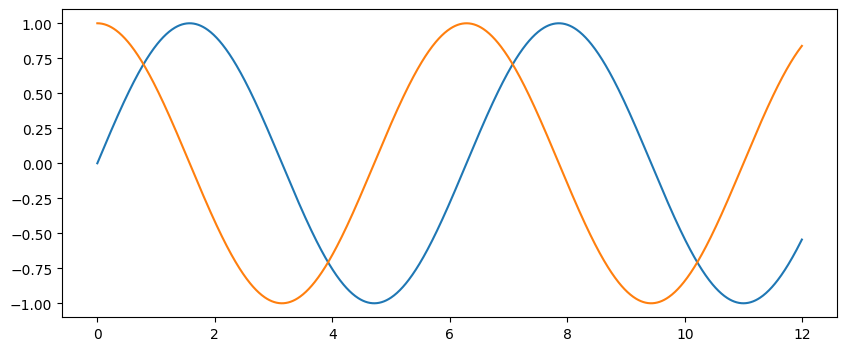

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

#### 그래프 커스터마이징
- 1. grid(True) : 격자 무늬 추가
- 2. title() : 그래프 제목 추가
- 3. xlabel, ylabel : 축 제목 추가
- 4. legend() : 데이터 의미 구분


In [ ]:
def drawGraph() :
  plt.figure(figsize=(10, 4))
  plt.plot(t, np.sin(t)) #plt.plot(t, np.sin(t), label="sin") : 라벨 설정의 또 다른 방식
  plt.plot(t, np.cos(t))
  plt.grid(True) # 배경 그리드 설정
  plt.title("Example of sinewave")
  plt.xlabel("time") # 축 설명
  plt.ylabel("Amplitude") # 축 설명
  plt.legend(labels=["sin", "cos"]) # loc="upper right" 옵션 등으로 위치 변경 가능
  plt.show()

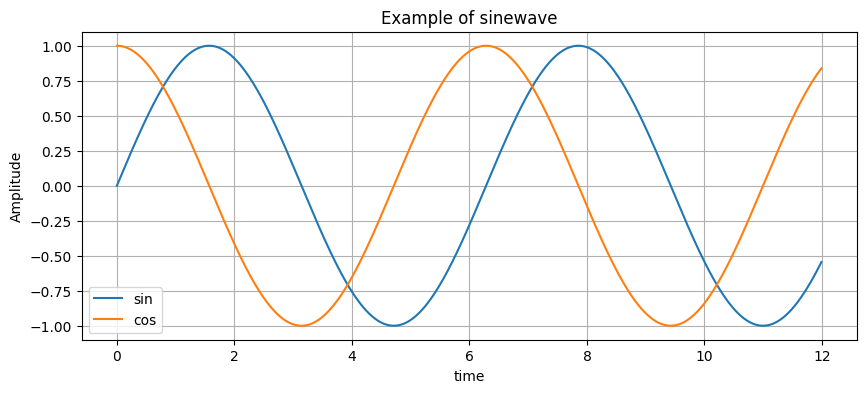

In [ ]:
drawGraph()

### 예제 2: 그래프 커스텀

In [ ]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

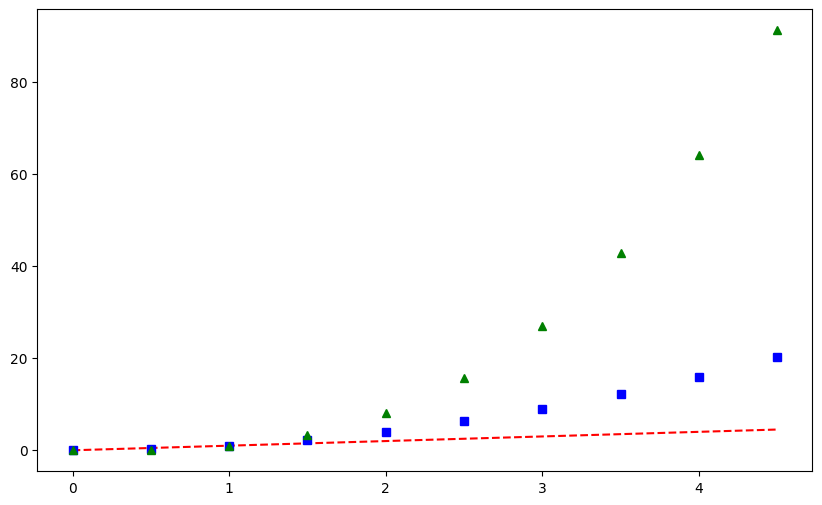

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--") # red , --- (점선 형태)
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g^")
plt.show()

In [ ]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

In [ ]:
def drawGraph():
  plt.figure(figsize=(10, 6))
  plt.plot(
      t,
      y,
      color="red", # 선 색상
      linestyle="dashed", # 선 모양
      marker="o", # 마커 모양
      markerfacecolor="yellow", # 마커 색상
      markersize=15, # 마커 크기
  )
  plt.xlim([-0.5, 10])
  plt.ylim([0.5, 9.5])

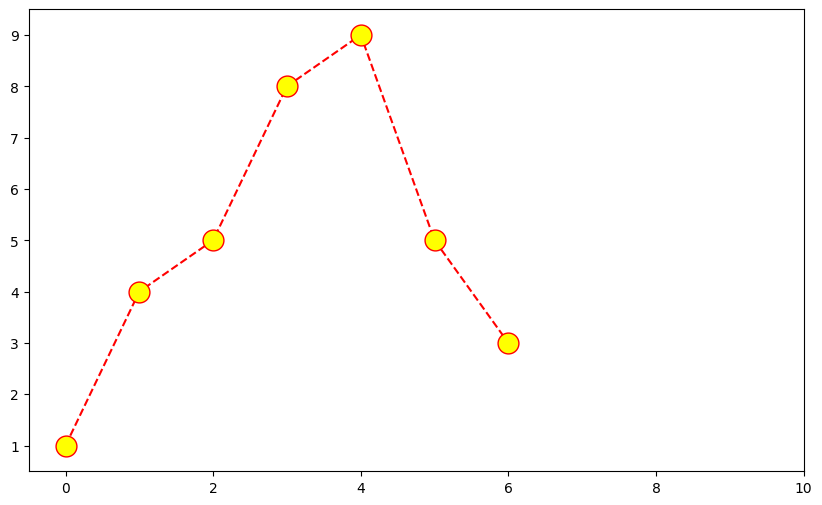

In [ ]:
drawGraph()

### 예제3: scatter plot

In [ ]:
t = np.array(range(0, 10))
y = np.array([0, 8, 7, 9, 8, 3, 2, 4, 3, 4])

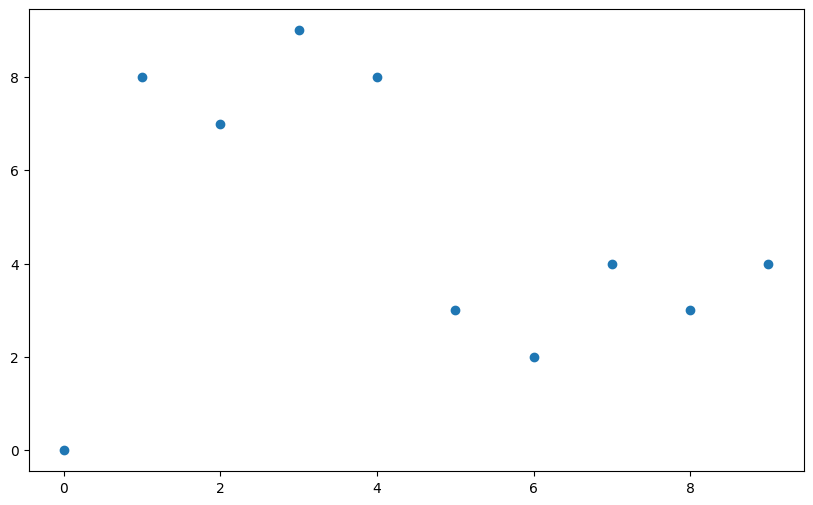

In [ ]:
def drawGraph():
  plt.figure(figsize=(10, 6))
  plt.scatter(t, y)
  plt.show()

drawGraph()

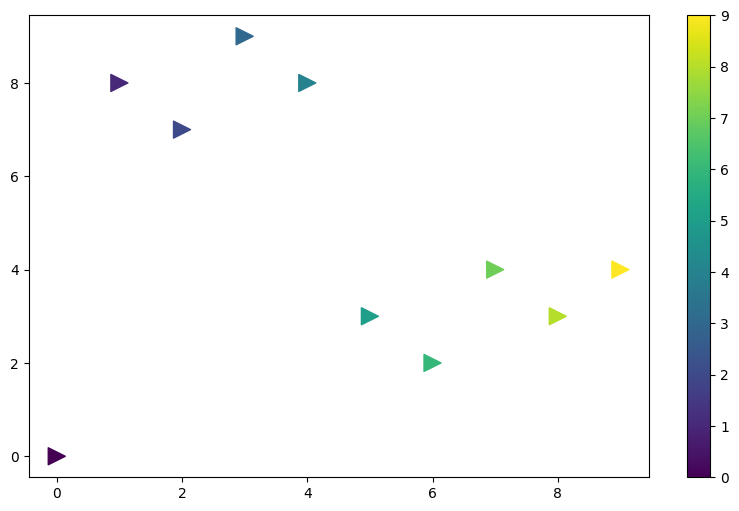

In [ ]:
colormap = t

def drawGraph():
  plt.figure(figsize=(10, 6))
  plt.scatter(t, y, s=150, c=colormap, marker=">") # s : 마커의 사이즈
  plt.colorbar()
  plt.show()

drawGraph()

### 예제4. Pandas에서 plot 그리기

* matplotlib을 가져와서 사용

In [ ]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<Axes: xlabel='구별'>

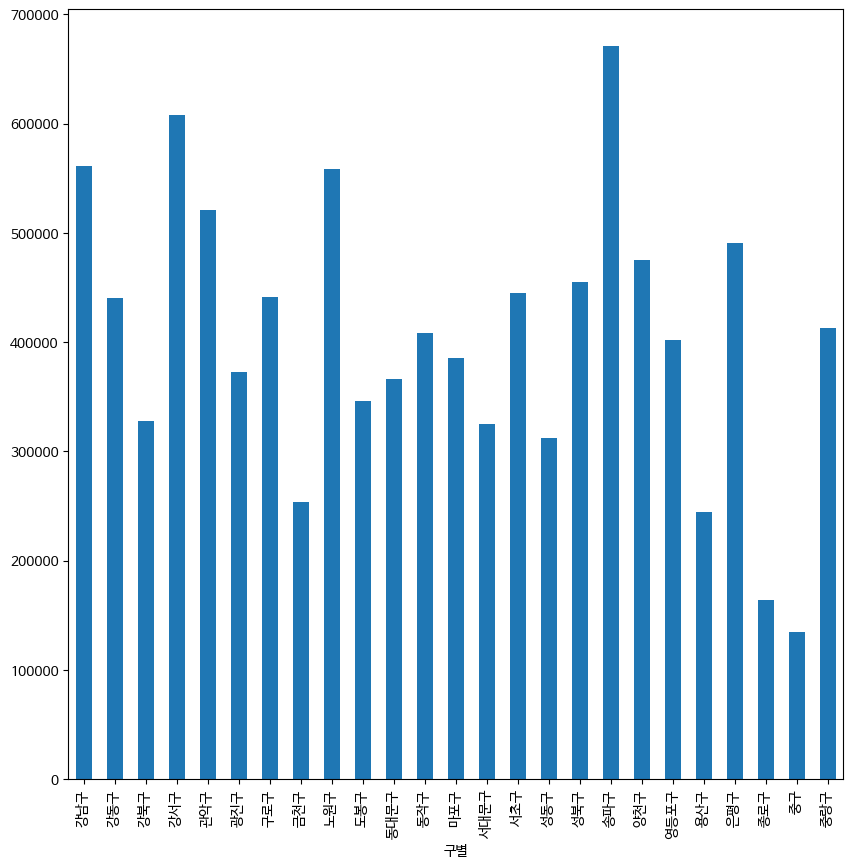

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
data_result["인구수"].plot(kind="bar", figsize=(10, 10)) #barh : horizon, 가로